In [2]:
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import sklearn
import numpy as np

import preprocessing_utils as prep

In [3]:
df = pd.read_csv('idea_data_2024.csv')

df["timestamp"] = pd.to_datetime(df["timestamp"])

df.head()


,timestamp,open,high,low,close,volume
0,2024-01-01 13:31:00+05:30,17.50,17.55,17.40,17.45,3025174
1,2024-01-01 13:32:00+05:30,17.45,17.45,17.35,17.40,3438033
2,2024-01-01 13:33:00+05:30,17.40,17.45,17.35,17.35,3760706
3,2024-01-01 13:34:00+05:30,17.40,17.40,17.35,17.40,557614
4,2024-01-01 13:35:00+05:30,17.40,17.40,17.35,17.40,481182


In [4]:
df, idxx, idxy = prep.extract_features(df)
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'normalized_value', 'loc_min', 'loc_max'],
      dtype='object')

In [5]:
df = prep.create_train_data(df)
prep.analyze_dataset(df)


{'missing_values': {'volume': 0,
  'normalized_value': 0,
  '3_reg': 0,
  '5_reg': 0,
  '10_reg': 0,
  '20_reg': 0,
  'target': 0},
 'data_types': {'volume': dtype('int64'),
  'normalized_value': dtype('float64'),
  '3_reg': dtype('float64'),
  '5_reg': dtype('float64'),
  '10_reg': dtype('float64'),
  '20_reg': dtype('float64'),
  'target': dtype('int64')},
 'unique_values': {'volume': 25274,
  'normalized_value': 298,
  '3_reg': 244,
  '5_reg': 1208,
  '10_reg': 8534,
  '20_reg': 18402,
  'target': 2},
 'numeric_stats': {'volume': {'count': 25633.0,
   'mean': 1407722.3624234386,
   'std': 10947573.893416794,
   'min': 0.0,
   '25%': 144320.0,
   '50%': 401868.0,
   '75%': 1277946.0,
   'max': 1571529211.0},
  'normalized_value': {'count': 25633.0,
   'mean': 0.569247012805272,
   'std': 0.4638226275134437,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.99999990000001,
   '75%': 0.9999999800000005,
   'max': 0.999999997142857},
  '3_reg': {'count': 25633.0,
   'mean': 0.000434010845394606

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
scaler = MinMaxScaler()
y = df.pop('target').to_numpy()
y = y.reshape(y.shape[0], 1)

x = scaler.fit_transform(df)

train_x, test_x, train_y, test_y = train_test_split(x, y, \
            test_size = 0.05, random_state = 50, shuffle = True)

In [7]:
lr = LogisticRegression()
lr.fit(train_x, train_y)

c:\Users\Joel\projects\MarginCall\bingo\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [8]:
predictions = lr.predict(test_x)
score = lr.score(test_x, test_y)
print(score)

0.9617784711388455


In [9]:
def _threshold(predictions, threshold):

        prob_thresholded = [0 if x > threshold else 1 for x in predictions[:, 0]]

        return np.array(prob_thresholded)
predictions_proba = lr._predict_proba_lr(test_x)
predictions_proba_thresholded = _threshold(predictions_proba, 0.98)


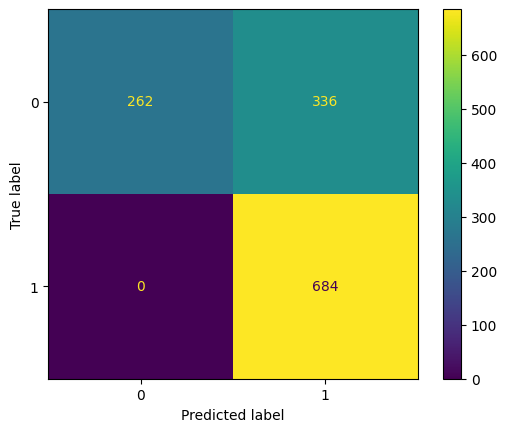

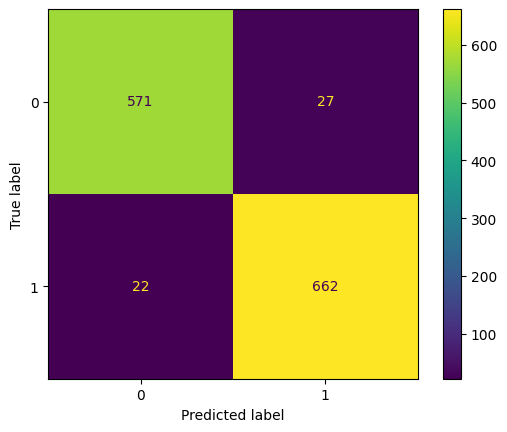

In [10]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(test_y, predictions)
cmd = ConfusionMatrixDisplay(cm)

cm_thresholded = confusion_matrix(test_y, predictions_proba_thresholded)
disp = ConfusionMatrixDisplay(cm_thresholded)
disp.plot()
cmd.plot()
plt.show()


In [11]:
accuracy = accuracy_score(test_y, predictions)
class_report = classification_report(test_y, predictions)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       598
           1       0.96      0.97      0.96       684

    accuracy                           0.96      1282
   macro avg       0.96      0.96      0.96      1282
weighted avg       0.96      0.96      0.96      1282



In [12]:
import joblib

joblib.dump(lr, "LR-model.joblib")

['LR-model.joblib']